# DEEP LEARNING BASED FOOD CALORIE ESTIMATOR

### WHAT AM I EATING?


# Training model for binary classification

In [1]:
from __future__ import print_function
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

2023-10-23 18:01:52.249850: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
classifier = Sequential()    #Creating an object of the sequential class below


In [3]:
classifier.add(Conv2D(32, (3, 3), padding='same', input_shape = (100, 100, 3), activation = 'relu'))


In [4]:
classifier.add(Conv2D(32, (3, 3), activation='relu'))

In [5]:

classifier.add(MaxPooling2D(pool_size = (2, 2)))



In [6]:
classifier.add(Dropout(0.25))

* Adding additional bundles of layers similar to above will help our model to detect more complex features which will improve the classification accuracy.

In [7]:
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

* Flatten will flatten the feature map to one dimension
* Then we add a fully connected layer which will convert our feature map to n-dimentional vector
* Then we apply our final dropout layer.

In [8]:
classifier.add(Flatten())
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dropout(0.5))

* Dense is the function to add a fully connected layer, ‘units’ is where we define the number of nodes that should be present in this hidden layer, these units value will be always between the number of input nodes and the output nodes
* In the final dense(fully-connected) layer, we convert the vector map into the vector map with number of vectors equal to the number of classes our model needs to classify.
* The activation function for last layer of the model will convert the vector map into the probability for the number of classes specified.

In [9]:
classifier.add(Dense(2, activation='sigmoid'))

* Now we compile with this model with a loss function which measures difference between the predictions and expectations
* This loss propogates backwards (taking derivative of loss with respect to weights) updating weight values so that they change in the direction of the gradient that will minimize the loss in future.
* The optimizer specified will perform gradient descend.

In [10]:
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

* Then we do image preprocessing so that all the images we provide to model in the training phase would be of size 100x100

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('Fruit_360/2/Training',
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('Fruit_360/2/Testing',
                                            target_size = (100, 100), 
                                            batch_size = 32, 
                                            class_mode = 'categorical')

Found 982 images belonging to 2 classes.
Found 330 images belonging to 2 classes.


In [12]:
classifier.fit_generator(training_set,
steps_per_epoch = 982/32,
epochs = 5,
validation_data = test_set,
validation_steps = 330/32)

/var/folders/rc/863c8l0j14n923dgs44tycfn1j0rdj/T/ipykernel_56782/1822185633.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


Epoch 1/5
30/30 [==============================] - 17s 518ms/step - loss: 0.4616 - accuracy: 0.7923 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 2/5
30/30 [==============================] - 15s 495ms/step - loss: 8.1046e-04 - accuracy: 1.0000 - val_loss: 1.2206e-04 - val_accuracy: 1.0000
Epoch 3/5
30/30 [==============================] - 15s 493ms/step - loss: 6.2901e-05 - accuracy: 1.0000 - val_loss: 1.1961e-05 - val_accuracy: 1.0000
Epoch 4/5
30/30 [==============================] - 16s 504ms/step - loss: 0.9954 - accuracy: 0.9847 - val_loss: 3.3789e-05 - val_accuracy: 1.0000
Epoch 5/5
30/30 [==============================] - 16s 519ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 1.7765e-05 - val_accuracy: 1.0000


* Function to identify the type of fruit and its count

1/1 [==============================] - 0s 247ms/step


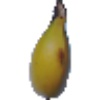

Banana
1/1 [==============================] - 0s 26ms/step


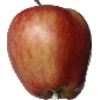

Apple
1/1 [==============================] - 0s 26ms/step


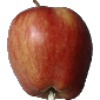

Apple
1/1 [==============================] - 0s 23ms/step


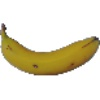

Banana
1/1 [==============================] - 0s 22ms/step


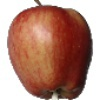

Apple
1/1 [==============================] - 0s 23ms/step


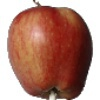

Apple
1/1 [==============================] - 0s 24ms/step


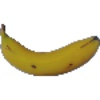

Banana
1/1 [==============================] - 0s 24ms/step


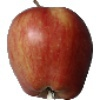

Apple
1/1 [==============================] - 0s 23ms/step


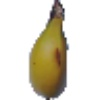

Banana
1/1 [==============================] - 0s 23ms/step


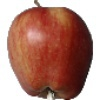

Apple
Number of Apples predicted:  6
Number of Bananas predicted:  4


In [13]:
import numpy as np
from IPython.display import Image
from keras.preprocessing import image

imageID = 1

## Initial count of apples and banana set to 0
AppleCount=0
BananaCount=0
for i in range(10):
    ## Reading each image in path
    path = "Fruit_360/2/val/" + str(imageID) + ".jpg"
    imageID+=1
    test_image = image.load_img(path, target_size = (100, 100))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    training_set.class_indices
    
    ## if 0 then apple predicted, else banana
    if result[0][0] == 1:
        display(Image(filename = path, width=100, height=100))
        prediction = 'Apple'
        print(prediction)
        AppleCount+=1
        
    elif result[0][0] == 0:
        display(Image(filename = path, width=100, height=100))
        prediction = 'Banana'
        print(prediction)
        BananaCount+=1

print("Number of Apples predicted: ", AppleCount)
print("Number of Bananas predicted: ", BananaCount)

# Training for multiple classification with change in parameters

In [14]:
## Linear stack of layers
classifier3 = Sequential()   
classifier3.add(Conv2D(32, (3, 3), padding='same', input_shape = (100, 100, 3), activation = 'relu'))
classifier3.add(Conv2D(32, (3, 3), activation='relu'))
classifier3.add(MaxPooling2D(pool_size = (2, 2)))
classifier3.add(Dropout(0.25))

classifier3.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier3.add(Conv2D(64, (3, 3), activation='relu'))
classifier3.add(MaxPooling2D(pool_size = (2, 2)))
classifier3.add(Dropout(0.25))

classifier3.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier3.add(Conv2D(64, (3, 3), activation='relu'))
classifier3.add(MaxPooling2D(pool_size = (2, 2)))
classifier3.add(Dropout(0.25))

classifier3.add(Flatten())
classifier3.add(Dense(units = 512, activation = 'relu'))
classifier3.add(Dropout(0.5))
classifier3.add(Dense(60, activation='softmax'))
classifier3.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('Fruit_360/60/Training',
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('Fruit_360/60/Testing',
                                            target_size = (100, 100), 
                                            batch_size = 32, 
                                            class_mode = 'categorical')

Found 28736 images belonging to 60 classes.
Found 9673 images belonging to 60 classes.


In [ ]:
classifier3.fit_generator(training_set,
steps_per_epoch = 28736/32,
epochs = 10,
validation_data = test_set,
validation_steps = 9673/32)

Epoch 1/10


/var/folders/rc/863c8l0j14n923dgs44tycfn1j0rdj/T/ipykernel_56782/1059968198.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier3.fit_generator(training_set,


898/898 [==============================] - 756s 841ms/step - loss: 1.8207 - accuracy: 0.4766 - val_loss: 0.3776 - val_accuracy: 0.8782
Epoch 2/10
898/898 [==============================] - 783s 872ms/step - loss: 0.3488 - accuracy: 0.8913 - val_loss: 0.1883 - val_accuracy: 0.9514
Epoch 3/10
898/898 [==============================] - 662s 737ms/step - loss: 0.1826 - accuracy: 0.9464 - val_loss: 0.1596 - val_accuracy: 0.9453
Epoch 4/10
898/898 [==============================] - 734s 817ms/step - loss: 0.1465 - accuracy: 0.9625 - val_loss: 0.1191 - val_accuracy: 0.9654
Epoch 5/10
898/898 [==============================] - 718s 800ms/step - loss: 0.1159 - accuracy: 0.9705 - val_loss: 0.2460 - val_accuracy: 0.9507
Epoch 6/10
898/898 [==============================] - 724s 807ms/step - loss: 0.1235 - accuracy: 0.9705 - val_loss: 0.2435 - val_accuracy: 0.9542
Epoch 7/10
898/898 [==============================] - 814s 906ms/step - loss: 0.1105 - accuracy: 0.9761 - val_loss: 0.1877 - val_accura

In [ ]:
print (classifier.summary())

In [ ]:
print (classifier3.summary())

# Dependencies for Object Detection:

To successfully perform the object detection, we first need to install tensorflow for our python environment.

*Tensorflow Object Detection API depends on the following libraries:*

* Protobuf 2.
* Python-tk
* Pillow 1.0
* lxml
* tf Slim (which is included in the "tensorflow/models/research/" checkout)
* Jupyter notebook
* Keras
* Matplotlib
* Tensorflow
* Cython
* cocoapi
* ssd
* Pandas

To install tensorflow:

* For CPU

pip install tensorflow

* For GPU

pip install tensorflow-gpu

* Dataset used is scrapped image dataset from internet for object detection. The dataset contains images belonging to 10 different classes. These images are all labeled with all the labels stored in corrosponding .xml file for each image file.

# Protobuf Compilation

* The Tensorflow Object Detection API uses Protobufs to configure model and training parameters. Before the framework can be used, the Protobuf libraries must be compiled. This should be done by running the following command from the tensorflow/models/research/ directory:

        #From tensorflow/models/research/
    
        protoc object_detection/protos/*.proto --python_out=.

# Add Libraries to PYTHONPATH

* When running locally, the tensorflow/models/research/ and slim directories should be appended to PYTHONPATH. This can be done by running the following from tensorflow/models/research/:

        #From tensorflow/models/research/
        
        export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim

#  Testing the Installation

* You can test that you have correctly installed the Tensorflow Object Detection
API by running the following command:
        
        python object_detection/builders/model_builder_test.py

# Configuring the Object Detection Training Pipeline 

* The Tensorflow Object Detection API uses protobuf files to configure the training and evaluation process. The schema for the training pipeline can be found in object_detection/protos/pipeline.proto.

        A skeleton configuration file is shown below:
        
        model {
                (... Add model config here...)
              }

        train_config :
              {
                (... Add train_config here...)
              }

        train_input_reader: 
              {
                (... Add train_input configuration here...)
              }

        eval_config: 
              {
                  
              }

       eval_input_reader: 
             {
                (... Add eval_input configuration here...)
             }

# Defining Inputs

* The Tensorflow Object Detection API accepts inputs in the TFRecord file format. Users must specify the locations of both the training and evaluation files. Additionally, label map should be specified , which define the mapping between a class id and class name. The label map should be identical between training and evaluation datasets.

        An example input configuration looks as follows:
        
        tf_record_input_reader {
                                  input_path: "/usr/home/username/data/train.record"
                               }
        label_map_path: "/usr/home/username/data/label_map.pbtxt"

# Preparing Inputs

* Tensorflow Object Detection API reads data using the TFRecord file format.

In [ ]:
# CODE TO CHECK IF IMAGE HAS MORE THAN RGB COMPONENT
from PIL import Image     
import os       
path = 'images/' 
for file in os.listdir(path):      
     extension = file.split('.')[-1]
     if extension == 'jpg' or extension == 'jpeg' or extension == 'png':
           fileLoc = path+file
           img = Image.open(fileLoc)
           if img.mode != 'RGB':
                 print(file+', '+img.mode)

* Deleted such images because tensors are generated of more size than expected and so it crashes, to ensure this does not happen, we deleted such images

# Generating the TFRecord files.

* Images are labelled using lblImg [https://github.com/tzutalin/labelImg] which is in xml format. 
* XML files are then converted to csv format using sml_to_csv.py [https://github.com/datitran/raccoon_dataset/blob/master/xml_to_csv.py]

        Now the folder structure for object detection will look as follows
        
        Object-Detection
        -data/
            --test_labels.csv
            --train_labels.csv
        -images/
            --test/
                ---testingimages.jpg
            --train/
                ---testingimages.jpg
            --...yourimages.jpg
        -training
        -xml_to_csv.py
        
* To convert these into TFRecords, run the following commands:

        python generate_tfrecord.py --csv_input=data/train_labels.csv --output_path=data/train.record

        python generate_tfrecord.py --csv_input=data/test_labels.csv --output_path=data/test.record

# TensorFlow Object Detection Model

* model used for object detection is coco trained ssd_mobilenet_v1 which can be downloaded from [https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md] with the configuration file ssd_mobilenet_v1_pets.config from [https://github.com/tensorflow/models/tree/master/research/object_detection/samples/configs]

* start the training with:

        python train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/ssd_mobilenet_v1_pets.config
        
* From models/object_detection, via terminal, start TensorBoard with:

        tensorboard --logdir='training'

# Creating the inference graph from the trained model checkpoint file
    

        python export_inference_graph.py --input_type image_tensor --pipeline_config_path training/ssd_mobilenet_v1_pets.config --trained_checkpoint_prefix training/model.ckpt-200 --output_directory 8fruit_graph
        
* This inference graph can be used to test out the object detection.

# Object Detection Demo

## Imports

In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if tf.__version__ < '1.4.0':
  raise ImportError('Please upgrade your tensorflow installation to v1.4.* or later!')

In [2]:
# This is needed to display the images.
%matplotlib inline

## Object detection imports
Here are the imports from the object detection module.

In [3]:
from utils import label_map_util

from utils import visualization_utils as vis_util

ImportError: cannot import name 'label_map_util' from 'utils' (/Users/sunil.kashyap/sunil/krishna/Food-calorie-estimation-using-deep-learning/Final Project/env/lib/python3.9/site-packages/utils/__init__.py)

# Model preparation

## Variables

Any model exported using the `export_inference_graph.py` tool can be loaded here simply by changing `PATH_TO_CKPT` to point to a new .pb file.  

By default we use an "SSD with Mobilenet" model here. See the [detection model zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.

SSD model provides great speed compared to models like RCNN and RFCN but these has a tradeoff between speed and accuracy.

SSD gains speed by doing 2 things in a single step namely : Region proposal network and usage of them in either fully-connected layers or position-sensitive convolutional layers to classify those regions[1]

![title](picture.png)


Concretely, given an input image and a set of ground truth labels, SSD does the following:

1. Pass the image through a series of convolutional layers, yielding several sets of feature maps at different scales (e.g. 10x10, then 6x6, then 3x3, etc.)
2. For each location in each of these feature maps, use a 3x3 convolutional filter to evaluate a small set of default bounding boxes. These default bounding boxes are essentially equivalent to Faster R-CNN’s anchor boxes.
3. For each box, simultaneously predict a) the bounding box offset and b) the class probabilities
4. During training, match the ground truth box with these predicted boxes based on IoU. The best predicted box will be labeled a “positive,” along with all other boxes that have an IoU with the truth >0.5. [1]

For more details about the SSD Architecture refer to this link:
[1] https://towardsdatascience.com/deep-learning-for-object-detection-a-comprehensive-review-73930816d8d9

In [4]:
# What model to download.
MODEL_NAME = '8fruit_graph_1'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('training', 'object-detection.pbtxt')

NUM_CLASSES = 8

## Load a (frozen) Tensorflow model into memory.

In [5]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

AttributeError: module 'tensorflow' has no attribute 'GraphDef'

## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [ ]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

## Helper code

In [ ]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Detection

In [ ]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(3, 24) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (50, 50)

In [ ]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

In [ ]:
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=2)
  plt.figure(figsize=(16,9))
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image_np)

# CONCLUSION

* In this paper, we present the fruit detection and recognition system that we built, using deep convolutional neural network for the recognition of food images from the 8-class dataset that we acquired using Google image searches, while keeping the model training time low to enable faster fine-tuning. Training the model with different epochs further improvement in test accuracy data expansion, which could also be achieved by collecting more training data or by optimizing the architecture and hyper-parameters of the network, considering overtraining problem at the same time. We have written a function which determines calories based on the fruit detected by taking in consideration the average calorie value of that fruit.

# REFERENCES

[1] Y. LeCun, B. Boser, J. S. Denker, D. Henderson, R. E.Howard, W. Hubbard, and L. D. Jackel. Backpropagation applied to handwritten zip code recognition.Neural Comput., 1(4):541–551, Dec. 1989. [2] https://www.kaggle.com/moltean/fruits [3] http://cv-tricks.com/tensorflow-tutorial/training-convolutional-neural-network-for-image-classification/ [4] https://becominghuman.ai/tensorflow-object-detection-api-tutorial-training-and-evaluating-custom-object-detector-ed2594afcf73 [5] https://github.com/tzutalin/labelImg [6] https://github.com/datitran/raccoon_dataset [7] https://towardsdatascience.com/how-to-train-your-own-object-detector-with-tensorflows-object-detector-api-bec72ecfe1d9 [8] http://cv-tricks.com/object-detection/faster-r-cnn-yolo-ssd/ [9] https://faroit.github.io/keras-docs/1.0.1/getting-started/sequential-model-guide/ [10] https://databricks.com/blog/2016/01/25/deep-learning-with-apache-spark-and-tensorflow.html [11] https://towardsdatascience.com/deep-learning-for-object-detection-a-comprehensive-review-73930816d8d9 [12] https://github.com/kawitkars/Food-calorie-estimation-using-deep-learning

# LICENCES

*The text in the document by Chintan Koticha, Chinmay Keskar, Sneha Kawitkar and is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/

*The code in the document by Chintan Koticha, Chinmay Keskar, Sneha Kawitkar and is licensed under the MIT License https://opensource.org/licenses/MIT

In [ ]:
pip install object_detection